In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#To import the dataset
df = pd.read_csv('LBW_Dataset.csv')
df.head()

,Community,Age,Weight,Delivery phase,HB,IFA,BP,Education,Residence,Result
0,1,21.0,42.0,1.0,9.2,1,1.375,5.0,1.0,0
1,1,21.0,NaN,1.0,8.8,1,1.500,5.0,1.0,0
2,1,21.0,NaN,1.0,9.2,1,2.125,5.0,1.0,0
3,1,21.0,NaN,1.0,8.0,1,1.375,5.0,1.0,0
4,1,24.0,33.0,1.0,9.3,1,1.571,5.0,1.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Community       96 non-null     int64  
 1   Age             89 non-null     float64
 2   Weight          85 non-null     float64
 3   Delivery phase  92 non-null     float64
 4   HB              77 non-null     float64
 5   IFA             96 non-null     int64  
 6   BP              81 non-null     float64
 7   Education       93 non-null     float64
 8   Residence       94 non-null     float64
 9   Result          96 non-null     int64  
dtypes: float64(7), int64(3)
memory usage: 7.6 KB


In [4]:
df.shape

(96, 10)

In [5]:
#To check missing values
df.isna().sum()

Community          0
Age                7
Weight            11
Delivery phase     4
HB                19
IFA                0
BP                15
Education          3
Residence          2
Result             0
dtype: int64

In [6]:
#To drop data with missing values
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Community         0
Age               0
Weight            0
Delivery phase    0
HB                0
IFA               0
BP                0
Education         0
Residence         0
Result            0
dtype: int64

In [8]:
df.describe()

,Community,Age,Weight,Delivery phase,HB,IFA,BP,Education,Residence,Result
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0,64.000000,64.000000
mean,2.234375,23.765625,46.640625,1.015625,9.095312,0.843750,1.703563,5.0,1.171875,0.906250
std,1.231107,3.336866,8.397594,0.125000,0.831031,0.365963,1.557062,0.0,0.380254,0.293785
min,1.000000,17.000000,30.000000,1.000000,5.900000,0.000000,1.222222,5.0,1.000000,0.000000
25%,1.000000,21.000000,40.000000,1.000000,8.900000,1.000000,1.375000,5.0,1.000000,1.000000
50%,3.000000,24.000000,45.000000,1.000000,9.000000,1.000000,1.464286,5.0,1.000000,1.000000
75%,3.000000,26.000000,51.250000,1.000000,9.200000,1.000000,1.584821,5.0,1.000000,1.000000
max,4.000000,38.000000,65.000000,2.000000,11.000000,1.000000,13.875000,5.0,2.000000,1.000000


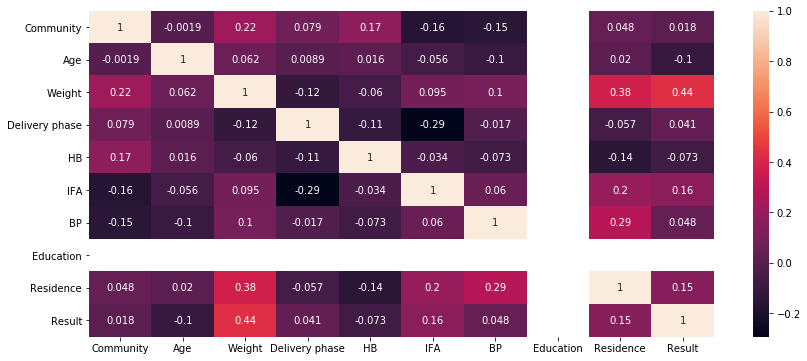

In [9]:
#To check correlation between data along with a heatmap
corr=df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr,annot=True)

In [10]:
X = df[['Community','Age','Weight','Delivery phase','HB','IFA','BP','Residence']]
y = df['Result']
y.unique()

array([0, 1], dtype=int64)

In [11]:
#Split data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [13]:
#To normalize data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [14]:
#X_train = X_train.to_numpy()
y_train = y_train.to_numpy().reshape(y_train.shape[0],1)
#X_test = X_test.to_numpy()
y_test = y_test.to_numpy().reshape(y_test.shape[0],1)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42, 8)
(42, 1)
(22, 8)
(22, 1)


In [16]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8, 42)
(1, 42)
(8, 22)
(1, 22)


In [17]:
#Define sigmoid function and its gradient

def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

In [18]:
#To obtain layer sizes

def layer_sizes(X, Y, n_h):
    
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [19]:
#Initialize parameters. Weights are randomly initialized whereas biases are initialized to zero

def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) *0.01
    b1 = np.zeros((n_h , 1))
    W2 = np.random.randn(n_y, n_h) *0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [20]:
#Forward propagation of the data

def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    
    A_and_Z = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, A_and_Z

In [21]:
#To compute the binary cross entropy from predicted and real values of y

def compute_cost(A2, Y):

    m = Y.shape[1] # number of example

    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1-A2))
    cost = -1/m * np.sum(logprobs) 
    
    
    cost = float(np.squeeze(cost))  
    assert(isinstance(cost, float))
    
    return cost

In [22]:
#Backward propagation

def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2= A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T) 
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid_derv(A1) )
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [23]:
#To update parameters after 1 pass of forward and backward propagation

def update_parameters(parameters, grads, learning_rate = 1):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [24]:
def ANN(X, Y, n_h, num_iterations = 100):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y, n_h)[0]
    n_h = layer_sizes(X, Y, n_h)[1]
    n_y = layer_sizes(X, Y, n_h)[2]
    
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
         
        A2, cache = forward_propagation(X, parameters)
 
        cost = compute_cost(A2, Y)
        cost_list.append(cost*1000)
 
        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads, 0.1)
        
       # print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

Text(0, 0.5, 'cost')

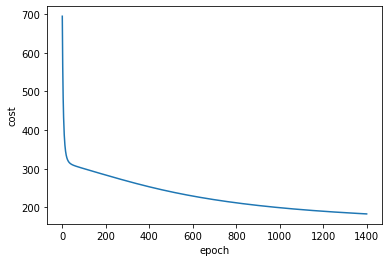

In [25]:
#Plot graph of cost vs epoch

cost_list=[]
iters= 1400
it = range(iters)
parameters = ANN(X_train, y_train, 15, iters)
plt.plot(it,cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')

In [26]:
#To check training accuracy

A2, cache = forward_propagation(X_train,parameters)
np.set_printoptions(threshold=np.inf)
train_predictions = np.zeros((A2.shape[0], A2.shape[1]))
train_predictions[A2>0.5]=1

print ("training accuracy = ", (np.sum(train_predictions == y_train))/ y_train.shape[1] * 100)

training accuracy =  95.23809523809523


In [27]:
#To check test accuracy

A2, cache = forward_propagation(X_test,parameters)
np.set_printoptions(threshold=np.inf)
test_predictions = np.zeros((A2.shape[0], A2.shape[1]))
test_predictions[A2>0.5]=1

print ("testing accuracy = ", (np.sum(test_predictions == y_test))/ y_test.shape[1] * 100)

testing accuracy =  90.9090909090909
